# Assignment 1 - Building a Vision Model with Keras

In this assignment, you will build a simple vision model using Keras. The goal is to classify images from the Fashion MNIST dataset, which contains images of clothing items.

You will:
1. Load and inspect the Fashion MNIST dataset.
2. Run a simple baseline model to establish a performance benchmark.
3. Build and evaluate a simple CNN model, choosing appropriate loss and metrics.
4. Design and run controlled experiments on one hyperparameter (e.g., number of filters, kernel size, etc.) and one regularization technique (e.g., dropout, L2 regularization).
5. Analyze the results and visualize the model's performance.

# 1. Loading and Inspecting the Dataset

Fashion MNIST is a dataset of grayscale images of clothing items, with 10 classes. Each image is 28x28 pixels, like the MNIST dataset of handwritten digits. Keras provides a convenient way to load this dataset. 

In this section, you should:

- [ ] Inspect the shapes of the training and test sets to confirm their size and structure.
- [ ] Convert the labels to one-hot encoded format if necessary. (There is a utility function in Keras for this.)
- [ ] Visualize a few images from the dataset to understand what the data looks like.

In [2]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize the pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Classes in the Fashion MNIST dataset
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [3]:
# Inspect the shapes of the datasets
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


# Convert labels to one-hot encoding
from tensorflow.keras.utils import to_categorical
y_train_onehot = to_categorical(y_train, num_classes=10)
y_test_onehot = to_categorical(y_test, num_classes=10)



X_train shape: (60000, 28, 28), y_train shape: (60000,)
X_test shape: (10000, 28, 28), y_test shape: (10000,)


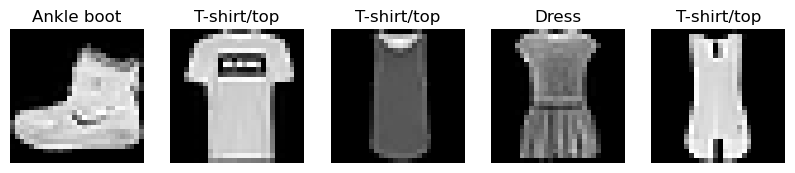

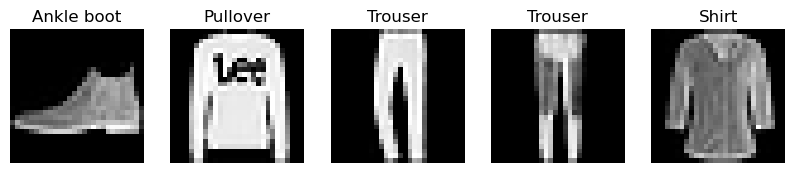

In [4]:
import matplotlib.pyplot as plt
# Verify the data looks as expected

#create a function to plot samples from the dataset
def plot_samples(X, y, num_samples=5):
    plt.figure(figsize=(10, 5))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(X[i], cmap='gray')
        plt.title(class_names[y[i]])
        plt.axis('off')
    plt.show()
# Plot a sample of 5 images from the training set
plot_samples(X_train, y_train, num_samples=5)

# Plot a sample from the test set
plot_samples(X_test, y_test, num_samples=5)




Reflection: Does the data look as expected? How is the quality of the images? Are there any issues with the dataset that you notice?

**Your answer here**

The predictor data appears to be the 28x28 pixels as described. 
Image quality is somewhat concerning. 
T-shirt/top class looks especially ambiguous and may conflict with Pullover, Dress, and Shirt classes.
Ankle boots may also look like hightop style (e.g. basketball) sneakers listed in class Sneaker.

# 2. Baseline Model

In this section, you will create a linear regression model as a baseline. This model will not use any convolutional layers, but it will help you understand the performance of a simple model on this dataset.
You should:
- [ ] Create a simple linear regression model using Keras.
- [ ] Compile the model with an appropriate loss function and optimizer.
- [ ] Train the model on the training set and evaluate it on the test set.

A linear regression model can be created using the `Sequential` API in Keras. Using a single `Dense` layer with no activation function is equivalent to a simple linear regression model. Make sure that the number of units in the output layer matches the number of classes in the dataset.

Note that for this step, we will need to use `Flatten` to convert the 2D images into 1D vectors before passing them to the model. Put a `Flatten()` layer as the first layer in your model so that the 2D image data can be flattened into 1D vectors.

In [19]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

# Create a simple linear regression model
model = Sequential()
# You can use `model.add(<layer>)` to add layers to the model
model.add(Flatten(input_shape=(28, 28)))  # Flatten the input
model.add(Dense(10))  # Dense layer with 10 units (one for each class)


# Compile the model using `model.compile()`
model.compile(optimizer= 'sgd', # Stochastic Gradient Descent optimizer appropriate for linear regression
              loss= 'mean_squared_error', # Mean Squared Error for regression
              metrics=['accuracy']
)

# Train the model with `model.fit()`
model.fit(X_train, 
          y_train_onehot, 
          epochs=10, 
          batch_size=32,
          validation_split=0.2
)

# Evaluate the model with `model.evaluate()`
model.evaluate(X_test, y_test_onehot)


Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0875 - accuracy: 0.5674 - val_loss: 0.0676 - val_accuracy: 0.6745
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0618 - accuracy: 0.7033 - val_loss: 0.0576 - val_accuracy: 0.7289
Epoch 3/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0549 - accuracy: 0.7419 - val_loss: 0.0528 - val_accuracy: 0.7547
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0510 - accuracy: 0.7618 - val_loss: 0.0500 - val_accuracy: 0.7672
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0486 - accuracy: 0.7747 - val_loss: 0.0477 - val_accuracy: 0.7742
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0468 - accuracy: 0.7825 - val_loss: 0.0462 - val_accuracy: 0.7812
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0454 - accuracy: 0.7884 - val_loss: 0.0451 - val_accuracy:

[0.04341738298535347, 0.7875000238418579]

Reflection: What is the performance of the baseline model? How does it compare to what you expected? Why do you think the performance is at this level?

**Your answer here**

The logistic regression results in a loss of 0.04 (MSE) and an accuracy of around 79%. This is better than I expected after viewing the images.

# 3. Building and Evaluating a Simple CNN Model

In this section, you will build a simple Convolutional Neural Network (CNN) model using Keras. A convolutional neural network is a type of deep learning model that is particularly effective for image classification tasks. Unlike the basic neural networks we have built in the labs, CNNs can accept images as input without needing to flatten them into vectors.

You should:
- [ ] Build a simple CNN model with at least one convolutional layer (to learn spatial hierarchies in images) and one fully connected layer (to make predictions).
- [ ] Compile the model with an appropriate loss function and metrics for a multi-class classification problem.
- [ ] Train the model on the training set and evaluate it on the test set.

Convolutional layers are designed to accept inputs with three dimensions: height, width and channels (e.g., RGB for color images). For grayscale images like those in Fashion MNIST, the input shape will be (28, 28, 1).

When you progress from the convolutional layers to the fully connected layers, you will need to flatten the output of the convolutional layers. This can be done using the `Flatten` layer in Keras, which doesn't require any parameters.

In [20]:
from keras.layers import Conv2D

# Reshape the data to include the channel dimension
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Create a simple CNN model
model = Sequential()
#add a convolutional layer (to learn spatial hierarchies in images) and one fully connected layer (to make predictions).
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))  # Convolutional layer
model.add(Flatten())  # Flatten the output from the convolutional layer
model.add(Dense(128, activation='relu'))  # Fully connected layer
model.add(Dense(10, activation='softmax'))  # Output layer with 10 units for each class

# Compile the model using `model.compile()`
model.compile(optimizer='adam',  # Adam optimizer for better convergence
                loss='categorical_crossentropy',  # Categorical Crossentropy for multi-class classification
                metrics=['accuracy']  # Accuracy as a metric
)


# Train the model
model.fit(X_train, 
          y_train_onehot, 
          epochs=10, 
          batch_size=32,
          validation_split=0.2
)

# Evaluate the model
model.evaluate(X_test, y_test_onehot)

Epoch 1/10
1500/1500 [==============================] - 68s 45ms/step - loss: 0.3894 - accuracy: 0.8612 - val_loss: 0.3045 - val_accuracy: 0.8901
Epoch 2/10
1500/1500 [==============================] - 71s 47ms/step - loss: 0.2477 - accuracy: 0.9098 - val_loss: 0.2777 - val_accuracy: 0.8973
Epoch 3/10
1500/1500 [==============================] - 73s 49ms/step - loss: 0.1919 - accuracy: 0.9301 - val_loss: 0.2789 - val_accuracy: 0.9039
Epoch 4/10
1500/1500 [==============================] - 72s 48ms/step - loss: 0.1484 - accuracy: 0.9440 - val_loss: 0.2852 - val_accuracy: 0.9071
Epoch 5/10
1500/1500 [==============================] - 72s 48ms/step - loss: 0.1111 - accuracy: 0.9595 - val_loss: 0.3042 - val_accuracy: 0.9069
Epoch 6/10
1500/1500 [==============================] - 70s 47ms/step - loss: 0.0845 - accuracy: 0.9693 - val_loss: 0.3549 - val_accuracy: 0.9032
Epoch 7/10
1500/1500 [==============================] - 70s 47ms/step - loss: 0.0632 - accuracy: 0.9770 - val_loss: 0.3789 -

[0.49096885323524475, 0.8999000191688538]

Reflection: Did the CNN model perform better than the baseline model? If so, by how much? What do you think contributed to this improvement?

**Your answer here**

Yes, the CNN model had better accuracy at ~90% vs ~79%. This is likely due the model was being able able to extract more information from 2 dimensions of data vs being reduced to a vector (1D).

# 3. Designing and Running Controlled Experiments

In this section, you will design and run controlled experiments to improve the model's performance. You will focus on one hyperparameter and one regularization technique.
You should:
- [ ] Choose one hyperparameter to experiment with (e.g., number of filters, kernel size, number of layers, etc.) and one regularization technique (e.g., dropout, L2 regularization). For your hyperparameter, you should choose at least three different values to test (but there is no upper limit). For your regularization technique, simply test the presence or absence of the technique.
- [ ] Run experiments by modifying the model architecture or hyperparameters, and evaluate the performance of each model on the test set.
- [ ] Record the results of your experiments, including the test accuracy and any other relevant metrics.
- [ ] Visualize the results of your experiments using plots or tables to compare the performance of different models.

The best way to run your experiments is to create a `for` loop that iterates over a range of values for the hyperparameter you are testing. For example, if you are testing different numbers of filters, you can create a loop that runs the model with 32, 64, and 128 filters. Within the loop, you can compile and train the model, then evaluate it on the test set. After each iteration, you can store the results in a list or a dictionary for later analysis.

Note: It's critical that you re-initialize the model (by creating a new instance of the model) before each experiment. If you don't, the model will retain the weights from the previous experiment, which can lead to misleading results.

In [ ]:
# A. Test Hyperparameters
# Number of Convolutional Filters

#create a list of filter counts to test
filter_list = [16, 32, 64, 128]
# Create a list to store results
filter_results = []

for filters in filter_list:
    # Create a new model for each filter count
    model_filter = Sequential()
    model_filter.add(Conv2D(filters, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
    model_filter.add(Flatten())
    model_filter.add(Dense(128, activation='relu'))
    model_filter.add(Dense(10, activation='softmax'))

    # Compile the model
    model_filter.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model_filter.fit(X_train, 
                                y_train_onehot, 
                                epochs=5, 
                                batch_size=32,
                                validation_split=0.2,
                                verbose=0)
    
    # Evaluate the model
    filer_test_loss, filter_test_accuracy = model_filter.evaluate(X_test, y_test_onehot, verbose=0)
    
    # Store the results
    filter_results.append((filters, filer_test_loss, filter_test_accuracy))




Filters: 16, Test Loss: 0.33, Test Accuracy: 0.90
Filters: 32, Test Loss: 0.31, Test Accuracy: 0.91
Filters: 64, Test Loss: 0.33, Test Accuracy: 0.90
Filters: 128, Test Loss: 0.35, Test Accuracy: 0.90


In [25]:
#quickly print the results so I don't have to run the models again
for filters, test_loss, test_accuracy in filter_results:
    print(f"Filters: {filters}, Test Loss: {test_loss:.2f}, Test Accuracy: {test_accuracy:.2f}")

Filters: 16, Test Loss: 0.33, Test Accuracy: 0.90
Filters: 32, Test Loss: 0.31, Test Accuracy: 0.91
Filters: 64, Test Loss: 0.33, Test Accuracy: 0.90
Filters: 128, Test Loss: 0.35, Test Accuracy: 0.90


In [39]:
print(filter_results)

[(16, 0.3304397761821747, 0.8956999778747559), (32, 0.31372523307800293, 0.9052000045776367), (64, 0.32775142788887024, 0.9009000062942505), (128, 0.3502982556819916, 0.8981999754905701)]


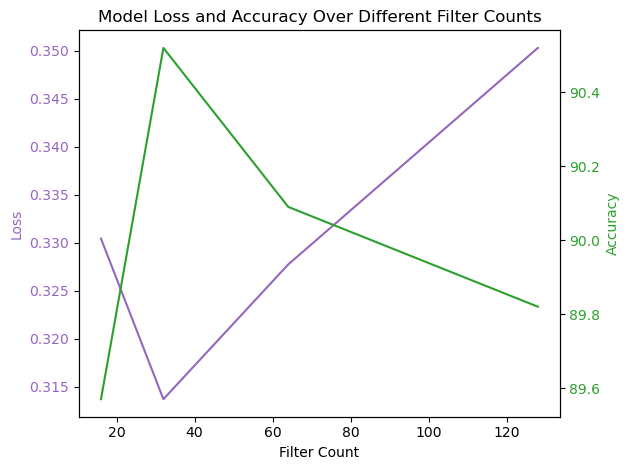

In [ ]:
#visualize the results of filter experiments

filter_counts = [result[0] for result in filter_results]
filter_accuracies = [result[2]*100 for result in filter_results]
filter_losses = [result[1] for result in filter_results]

# Create figure and axis
fig, ax1 = plt.subplots()

# Plot loss on primary y-axis
color = 'tab:purple'
ax1.set_xlabel('Filter Count')
ax1.set_ylabel('Loss', color=color)
ax1.plot(filter_counts, filter_losses, color=color, label='Loss')
ax1.tick_params(axis='y', labelcolor=color)

# Create second y-axis
ax2 = ax1.twinx()  # share the same x-axis

# Plot accuracy on secondary y-axis
color = 'tab:green'
ax2.set_ylabel('Accuracy', color=color)
ax2.plot(filter_counts, filter_accuracies, color=color, label='Accuracy (%)')
ax2.tick_params(axis='y', labelcolor=color)

# Title and layout
plt.title('Model Loss and Accuracy Over Different Filter Counts')
fig.tight_layout()
plt.show()




Therefore Accuracy was maximized and loss was minimized at Filter Count = 32.

In [38]:
# B. Test presence or absence of regularization

#dropout on/off
dropout_results = []
use_dropout_options = [False, True]

#for loop to test dropout
for use_dropout in use_dropout_options:
    # Create a new model for each dropout option
    model_dropout = Sequential()
    model_dropout.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1))) #filter count of 32 based on previous results
    model_dropout.add(Flatten())
    
    if use_dropout:
        from keras.layers import Dropout
        model_dropout.add(Dropout(0.5))  # Add dropout layer with 50% dropout rate
    
    model_dropout.add(Dense(128, activation='relu'))
    model_dropout.add(Dense(10, activation='softmax'))

    # Compile the model
    model_dropout.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model_dropout.fit(X_train, 
                                y_train_onehot, 
                                epochs=5, 
                                batch_size=32,
                                validation_split=0.2,
                                verbose=0)
    
    # Evaluate the model
    dropout_test_loss, dropout_test_accuracy = model_dropout.evaluate(X_test, y_test_onehot, verbose=0)
    
    # Store the results
    dropout_results.append((use_dropout, dropout_test_loss, dropout_test_accuracy))





In [41]:
# Print the results
for dropout, test_loss, test_accuracy in dropout_results:
    print(f"Filters: {filters}, Test Loss: {test_loss:.2f}, Test Accuracy: {test_accuracy:.2f}")

Filters: 128, Test Loss: 0.33, Test Accuracy: 0.90
Filters: 128, Test Loss: 0.29, Test Accuracy: 0.90


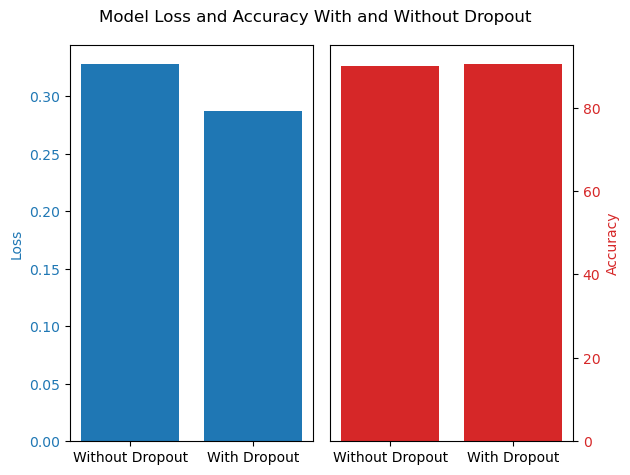

In [65]:
import numpy as np

#visualize the results of dropout experiments

dropout_options = ['Without Dropout', 'With Dropout']
dropout_accuracies = [result[2]*100 for result in dropout_results]
dropout_losses = [result[1] for result in dropout_results]
# Create figure and axis
fig, (ax1, ax2) = plt.subplots(1, 2)
# Plot accuracy on primary y-axis
color = 'tab:blue'
bar1 = ax1.bar(dropout_options, dropout_losses, color=color, label='Loss')
ax1.set_ylabel('Loss', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Plot accuracy on secondary y-axis
color = 'tab:red'
bar2 = ax2.bar(dropout_options, dropout_accuracies, color=color, label='Accuracy (%)')
ax2.set_ylabel('Accuracy', color=color)
ax2.yaxis.set_label_position("right")  # Move the y-axis label to the right

ax2.tick_params(axis='y', labelcolor=color)
ax2.yaxis.tick_right()  # Show ticks on the right side
# Title and layout
plt.suptitle('Model Loss and Accuracy With and Without Dropout')
plt.tight_layout()
plt.show()







Reflection: Report on the performance of the models you tested. Did any of the changes you made improve the model's performance? If so, which ones? What do you think contributed to these improvements? Finally, what combination of hyperparameters and regularization techniques yielded the best performance?

**Your answer here**

Models were comparable on accuracy regardless of dropout being on or off. However, the loss improved somewhat with dropout.

# 5. Training Final Model and Evaluation

In this section, you will train the final model using the best hyperparameters and regularization techniques you found in the previous section. You should:
- [ ] Compile the final model with the best hyperparameters and regularization techniques.
- [ ] Train the final model on the training set and evaluate it on the test set.
- [ ] Report the final model's performance on the test set, including accuracy and any other relevant metrics.

In [66]:
from keras.layers import Dropout

# Create a final CNN model
model_final = Sequential()
#add a convolutional layer (to learn spatial hierarchies in images) and one fully connected layer (to make predictions).
model_final.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))  # 32 filters based on experiment results
model_final.add(Flatten())  # Flatten the output from the convolutional layer
model_final.add(Dropout(0.5))  # Add dropout layer with 50% dropout rate per experimentation
model_final.add(Dense(128, activation='relu'))  # Fully connected layer
model_final.add(Dense(10, activation='softmax'))  # Output layer with 10 units for each class

# Compile the model using `model.compile()`
model_final.compile(optimizer='adam',  # Adam optimizer for better convergence
                loss='categorical_crossentropy',  # Categorical Crossentropy for multi-class classification
                metrics=['accuracy']  # Accuracy as a metric
)


# Train the model
model_final.fit(X_train, 
          y_train_onehot, 
          epochs=10, 
          batch_size=32,
          validation_split=0.2
)

# Evaluate the model
model_final.evaluate(X_test, y_test_onehot)


Epoch 1/10
1500/1500 [==============================] - 74s 49ms/step - loss: 0.4116 - accuracy: 0.8531 - val_loss: 0.3241 - val_accuracy: 0.8823
Epoch 2/10
1500/1500 [==============================] - 74s 49ms/step - loss: 0.2860 - accuracy: 0.8943 - val_loss: 0.3055 - val_accuracy: 0.8915
Epoch 3/10
1500/1500 [==============================] - 76s 51ms/step - loss: 0.2360 - accuracy: 0.9112 - val_loss: 0.2727 - val_accuracy: 0.9020
Epoch 4/10
1500/1500 [==============================] - 75s 50ms/step - loss: 0.2006 - accuracy: 0.9244 - val_loss: 0.2687 - val_accuracy: 0.9055
Epoch 5/10
1500/1500 [==============================] - 79s 53ms/step - loss: 0.1720 - accuracy: 0.9353 - val_loss: 0.2714 - val_accuracy: 0.9072
Epoch 6/10
1500/1500 [==============================] - 79s 53ms/step - loss: 0.1469 - accuracy: 0.9448 - val_loss: 0.2808 - val_accuracy: 0.9075
Epoch 7/10
1500/1500 [==============================] - 82s 55ms/step - loss: 0.1309 - accuracy: 0.9510 - val_loss: 0.2917 -

[0.3398774266242981, 0.9025999903678894]

Reflection: How does the final model's performance compare to the baseline and the CNN model? What do you think contributed to the final model's performance? If you had time, what other experiments would you run to further improve the model's performance?

**Your answer here**


Baseline: loss = 0.04 (MSE), Accuracy= 78.8%
Simple CNN: loss = 0.49 (Cat. Crossentropy), Accuracy= 90.0%
Final CNN: loss = 0.34 (Cat. Crossentropy), Accuracy= 90.3%

The final model had a small improvement on the Simple CNN in terms of loss metrics, but accuracy was similar. Both were an improvement on the baseline model (but used a different loss metric). 
Model improvements were mostly driven by opting for a CNN compared to logistic regression, with subsequent experimentation on hyperparameters and regularization yielding minimal improvements. 
This suggests that the typical hyperparameters used for this kind of problem are a strong starting point for CNNs.

In addition to the experimentation suggestions listed in the problem, the problem is laid out to assume that the regularization is additive to the hyperparamatarization rather than interactive - that is we were asked to test the independent influence of each on a model. Given the time I might look at the interaction between the 4 filter levels and 2 dropout levels leading to 8 models to compare.
Would also have been interesting to test some of the potential interaction between kernal sizes and the number of filters/kernals.

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.
### Submission Parameters:
* Submission Due Date: `23:59 PM - 06/07/2025`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb)
    * The Lab 1 notebook (labs/lab_1.ipynb)
    * The Lab 2 notebook (labs/lab_2.ipynb)
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
* Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.
Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.
If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-6-ml-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.